### PART I-A

In [76]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import glob,os
import matplotlib.gridspec as gridspec

In [78]:
#loading the DATA I-A
data_ia_df = pd.read_csv("ab40c054-5031-4376-b52e-9813e776f65e.csv")

In [79]:
#Checking for any duplicate rows
sum(data_ia_df.duplicated()) == 0

True

In [80]:
#Remove the rows: '(% Growth over previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.
data_ia_df = data_ia_df.loc[((data_ia_df["Items  Description"] == ('(% Growth over previous year)')) | (data_ia_df["Items  Description"] == ('GSDP - CURRENT PRICES (` in Crore)'))) & (data_ia_df['Duration'] != '2016-17')]

In [81]:
#Check for missing values
print (data_ia_df.isnull().sum())  
print (data_ia_df.isnull().values.any())
print (data_ia_df.isnull().values.sum())

Items  Description           0
Duration                     0
Andhra Pradesh               0
Arunachal Pradesh            0
Assam                        0
Bihar                        0
Chhattisgarh                 0
Goa                          0
Gujarat                      0
Haryana                      0
Himachal Pradesh             2
Jammu & Kashmir              0
Jharkhand                    0
Karnataka                    0
Kerala                       0
Madhya Pradesh               0
Maharashtra                  2
Manipur                      2
Meghalaya                    0
Mizoram                      2
Nagaland                     2
Odisha                       0
Punjab                       2
Rajasthan                    2
Sikkim                       0
Tamil Nadu                   0
Telangana                    0
Tripura                      2
Uttar Pradesh                0
Uttarakhand                  0
West Bengal1                 9
Andaman & Nicobar Islands    2
Chandiga

In [82]:
#Check % of null values column wise
data_ia_df.isnull().sum()*100/data_ia_df.shape[0] 

Items  Description             0.000000
Duration                       0.000000
Andhra Pradesh                 0.000000
Arunachal Pradesh              0.000000
Assam                          0.000000
Bihar                          0.000000
Chhattisgarh                   0.000000
Goa                            0.000000
Gujarat                        0.000000
Haryana                        0.000000
Himachal Pradesh              22.222222
Jammu & Kashmir                0.000000
Jharkhand                      0.000000
Karnataka                      0.000000
Kerala                         0.000000
Madhya Pradesh                 0.000000
Maharashtra                   22.222222
Manipur                       22.222222
Meghalaya                      0.000000
Mizoram                       22.222222
Nagaland                      22.222222
Odisha                         0.000000
Punjab                        22.222222
Rajasthan                     22.222222
Sikkim                         0.000000


In [83]:
#West Bengal seems to have 100% missing values, so we can go ahead and remove that particular column
data_ia_df = data_ia_df.drop('West Bengal1', axis=1)

In [84]:
#Check % of null values column wise again
data_ia_df.isnull().sum()*100/data_ia_df.shape[0]

Items  Description            0.000000
Duration                      0.000000
Andhra Pradesh                0.000000
Arunachal Pradesh             0.000000
Assam                         0.000000
Bihar                         0.000000
Chhattisgarh                  0.000000
Goa                           0.000000
Gujarat                       0.000000
Haryana                       0.000000
Himachal Pradesh             22.222222
Jammu & Kashmir               0.000000
Jharkhand                     0.000000
Karnataka                     0.000000
Kerala                        0.000000
Madhya Pradesh                0.000000
Maharashtra                  22.222222
Manipur                      22.222222
Meghalaya                     0.000000
Mizoram                      22.222222
Nagaland                     22.222222
Odisha                        0.000000
Punjab                       22.222222
Rajasthan                    22.222222
Sikkim                        0.000000
Tamil Nadu               

######  As we can see above, West Bengal has been removed. The null values can be ignored as of now as it is better to ignore it rather than exaggerating the data.

In [85]:
#Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16
df_average_growth_states = data_ia_df.loc[(data_ia_df["Items  Description"] == ('(% Growth over previous year)')) & (data_ia_df['Duration'].isin(['2013-14','2014-15','2015-16']))].mean()

#Dropping the 'All_India GDP' column as it does not hold much relevance with our analysis and sorting the result.
df_average_growth_states = df_average_growth_states.drop(labels=['All_India GDP']).sort_values(ascending=False)

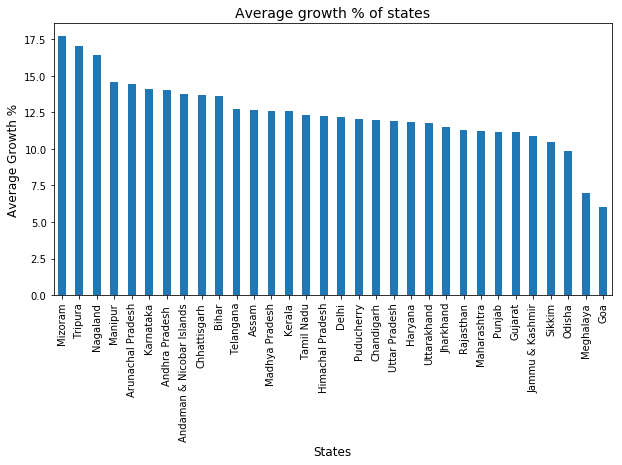

In [86]:
# Compare the calculated values and plot them for the states
df_average_growth_states.plot(kind="bar", figsize=(10,5), width=0.45)
plt.xlabel('States',fontsize=12)
plt.ylabel('Average Growth %',fontsize=12)
plt.title('Average growth % of states',fontsize=14)
plt.show()

###### * We can clearly see the states that have been growing consistently fast are: Mizoram(17.70), Tripura(17.03), Nagaland(16.41), Manipur(14.61) etc. 
###### * The states that have been struggling are Goa(6.03), Meghalaya(6.95),Odisha(9.83),Sikkim(10.48),Jammu&Kashmir(10.90) etc.
###### * Curiosity exercise: What has been the average growth rate of your home state, and how does it compare to the national average over this duration? My home state is Kerala and it seems to be at 14th position from top(including Andaman & Nicobar Islands) with an average growth rate of 12.58% which is more than the All_India GDP of 11.20%.

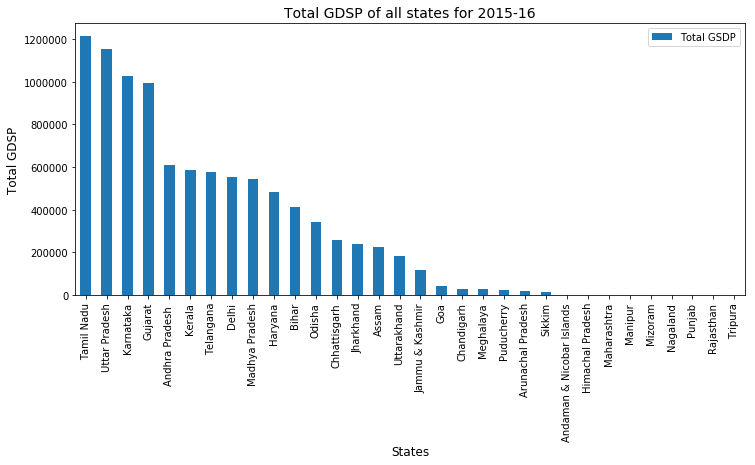

In [87]:
#Total GDP of states for the year 2015-16
df_total_gdp_2015_16 = data_ia_df[(data_ia_df["Items  Description"] == ('GSDP - CURRENT PRICES (` in Crore)')) & (data_ia_df['Duration'] == '2015-16')]
df_total_gdp_2015_16 = df_total_gdp_2015_16[df_total_gdp_2015_16.columns.difference(['Items  Description', 'Duration','All_India GDP'])]
df_total_gdp_2015_16 = df_total_gdp_2015_16.T
df_total_gdp_2015_16 = df_total_gdp_2015_16.rename(columns={4:'Total GSDP'})

#Plot Total GDP of the states for year 2015-16
df_total_gdp_2015_16 = df_total_gdp_2015_16.sort_values(by='Total GSDP',ascending=False)
df_total_gdp_2015_16.plot(kind="bar", figsize=(12,5))
#plt.yscale('log')
plt.xlabel('States',fontsize=12)
plt.ylabel('Total GDSP',fontsize=12)
plt.title('Total GDSP of all states for 2015-16',fontsize=14)
plt.show()

###### * Identify the top 5 and the bottom 5 states based on total GDP.
###### Top 5 states are : Tamil Nadu, Uttar Pradesh, Karnataka, Gujarat & Andhra Pradesh
###### Bottom 5 states are(including UT) : Sikkim, Arunachal Pradesh,Puducherry,Meghalaya,Chandigarh,Goa

#### PART I-B

In [88]:
# Path where all the files are stored
path = r'C:\Users\Rajeev\Desktop\Data Science\Course2_Statistics&EDA\EDA\GDP_Analysis_Assignment\DATA I-B'
# Reading all the paths
all_files = glob.glob(path + "/*.csv")

# Empty list to add all the dataframes
data_ib_li = []

# Loop to read each file with the path given in the filename variable.
for filename in all_files:
    # Reading each file as a pandas dataframe
    data_ib_df = pd.read_csv(filename, index_col=None, header=0,encoding='windows-1252')
    # Selecting only required columns
    data_ib_df = data_ib_df[['S.No.','Item','2014-15']]
    #Getting the dataframe with S.No. column to get the list of sub-sectors later
    df_toget_subsector_name = data_ib_df.copy()
    # Selecting the required columns in states dataframe
    data_ib_df = data_ib_df[['Item','2014-15']]
    # Transpose the data
    data_ib_df = data_ib_df.T
    # Taking the header row
    new_header = data_ib_df.iloc[0] #grab the first row for the header
    data_ib_df = data_ib_df[1:] #take the data less the header row
    # Assign the new header
    data_ib_df.columns = new_header 
    # Add the section name from the filename
    data_ib_df['States'] = filename.split('\\')[-1].split('.')[0].split('-')[1]
    #df = df.rename(columns={'2014-15': filename.split('.')[0].split('-')[1]})
    # Append the final DF to the list
    data_ib_li.append(data_ib_df)
    
# Creating a final DF by joining all the df's in the list li
data_ib_states_df = pd.concat(data_ib_li, axis=0, ignore_index=True)
data_ib_states_df['States'] = np.where(data_ib_states_df['States'].str.contains('_'),data_ib_states_df['States'].str.replace('_',' '),data_ib_states_df['States'])
data_ib_states_df = data_ib_states_df.set_index('States')

In [89]:
#Removing 'TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products','Population ('00)' columns.
data_ib_states_df = data_ib_states_df.drop(columns=['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products','Population (\'00)'])

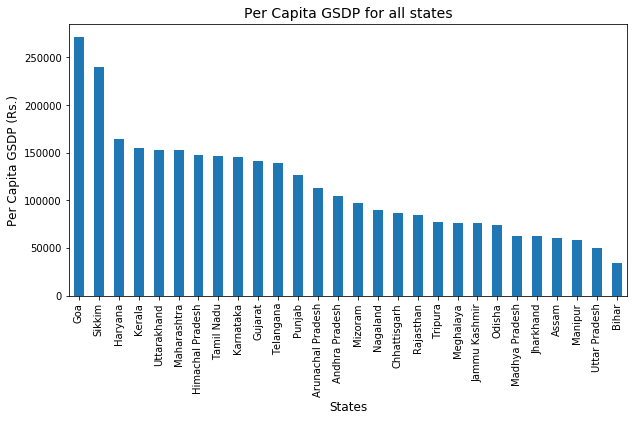

In [90]:
#Filtering out UTs
data_ib_states_indexed_df = data_ib_states_df.drop(index={'Delhi','Puducherry','Chandigarh'})

#Plot the GDP per capita for all the states
per_capita_gdp_df = data_ib_states_indexed_df.sort_values(by=['Per Capita GSDP (Rs.)'],ascending=False)
per_capita_gdp_df['Per Capita GSDP (Rs.)'].plot(kind="bar", figsize=(10,5))
plt.xlabel('States',fontsize=12)
plt.ylabel('Per Capita GSDP (Rs.)',fontsize=12)
plt.title('Per Capita GSDP for all states',fontsize=14)
plt.show()

###### Identify the top 5 and the bottom 5 states based on the GDP per capita.
###### * Top 5 states : Goa, Sikkim, Haryana, Kerala, Uttarakhand
###### * Bottom 5 states : Bihar,Uttar Pradesh,Manipur,Assam,Jharkhand

In [91]:
#ratio of the highest per capita GDP to the lowest per capita GDP.
ratio_highest_lowest_gdp = per_capita_gdp_df.loc[per_capita_gdp_df.index[0],'Per Capita GSDP (Rs.)'] / per_capita_gdp_df.loc[per_capita_gdp_df.index[-1],'Per Capita GSDP (Rs.)']
ratio_highest_lowest_gdp

8.004741709371503

In [92]:
#Calculating the % contribution of primary, secondary and tertiary sectors as a % of total GDP
per_capita_gdp_df['prim_gsdp_percentage'] = (per_capita_gdp_df['Primary'].div(per_capita_gdp_df['Gross State Domestic Product']) * 100)
per_capita_gdp_df['sec_gsdp_percentage'] = (per_capita_gdp_df['Secondary'].div(per_capita_gdp_df['Gross State Domestic Product']) * 100)
per_capita_gdp_df['ter_gsdp_percentage'] = (per_capita_gdp_df['Tertiary'].div(per_capita_gdp_df['Gross State Domestic Product']) * 100)

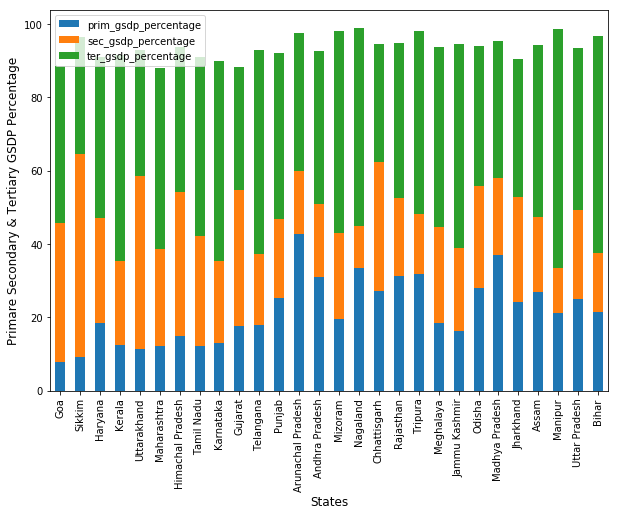

In [93]:
#Plot the percentage contribution of the primary sector as a percentage of the total GDP for all the states.
per_capita_gdp_df[['prim_gsdp_percentage','sec_gsdp_percentage','ter_gsdp_percentage']].plot(kind='bar',stacked=True,figsize=(10,7))
plt.xlabel('States',fontsize=12)
plt.ylabel('Primare Secondary & Tertiary GSDP Percentage',fontsize=12)
plt.show()

###### As seen in the above graph, the primary sector's contribution is minimum in states like Goa, Sikkim,Kerala,Uttarakhand etc. and maximum in ARunachal Pradesh, Rajasthan, Tripura etc. The secondary sector has major  contribution in states like Sikkim, Himachal Pradesh, Gujarat etc. The tertiary sector is dominant in Telangana, Bihar,Kerala etc.


In [94]:
#Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita
#GDP and C4, the lowest).
C1 = per_capita_gdp_df.loc[per_capita_gdp_df['Per Capita GSDP (Rs.)'].between(per_capita_gdp_df['Per Capita GSDP (Rs.)'].quantile(0.85),per_capita_gdp_df['Per Capita GSDP (Rs.)'].quantile(1.0))]
C2 = per_capita_gdp_df.loc[per_capita_gdp_df['Per Capita GSDP (Rs.)'].between(per_capita_gdp_df['Per Capita GSDP (Rs.)'].quantile(0.5),per_capita_gdp_df['Per Capita GSDP (Rs.)'].quantile(0.85))]
C3 = per_capita_gdp_df.loc[per_capita_gdp_df['Per Capita GSDP (Rs.)'].between(per_capita_gdp_df['Per Capita GSDP (Rs.)'].quantile(0.20),per_capita_gdp_df['Per Capita GSDP (Rs.)'].quantile(0.5))]
C4 = per_capita_gdp_df.loc[per_capita_gdp_df['Per Capita GSDP (Rs.)'].between(per_capita_gdp_df['Per Capita GSDP (Rs.)'].quantile(0),per_capita_gdp_df['Per Capita GSDP (Rs.)'].quantile(0.20))]

###### Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

In [95]:
#To sub-sectors that contribute to 80% GDP in Category-1 
sectors_list = ['Primary','Secondary','Tertiary']

#Find the sub-sectors
sub_sectors_df = df_toget_subsector_name.loc[(~df_toget_subsector_name['S.No.'].str.isdigit() == 0)]
sub_sectors_df = sub_sectors_df.iloc[0:-6,:]
sub_sectors_list = sub_sectors_df['Item'].tolist()

#Getting the top sub-sectors from C1 category
C1_subsectors_highgsdp = C1[[elem for elem in C1.columns.tolist() if elem in sub_sectors_list]].sum().sort_values(ascending=True)
C1_top_subsectors = C1_subsectors_highgsdp[((C1_subsectors_highgsdp.cumsum().div(C1['Gross State Domestic Product'].sum())) * 100 <= 80) == True].index.tolist()

In [96]:
#To sub-sectors that contribute to 80% GDP in Category-2
C2_subsectors_highgsdp = C2[[elem for elem in C2.columns.tolist() if elem in sub_sectors_list]].sum().sort_values(ascending=True)
C2_top_subsectors = C2_subsectors_highgsdp[((C2_subsectors_highgsdp.cumsum().div(C2['Gross State Domestic Product'].sum())) * 100 <= 80) == True].index.tolist()

In [97]:
#To sub-sectors that contribute to 80% GDP in Category-3
C3_subsectors_highgsdp = C3[[elem for elem in C3.columns.tolist() if elem in sub_sectors_list]].sum().sort_values(ascending=True)
C3_top_subsectors = C3_subsectors_highgsdp[((C3_subsectors_highgsdp.cumsum().div(C3['Gross State Domestic Product'].sum())) * 100 <= 80) == True].index.tolist()

In [98]:
#To sub-sectors that contribute to 80% GDP in Category-4
C4_subsectors_highgsdp = C4[[elem for elem in C4.columns.tolist() if elem in sub_sectors_list]].sum().sort_values(ascending=True)
C4_top_subsectors = C4_subsectors_highgsdp[((C4_subsectors_highgsdp.cumsum().div(C4['Gross State Domestic Product'].sum())) * 100 <= 80) == True].index.tolist()

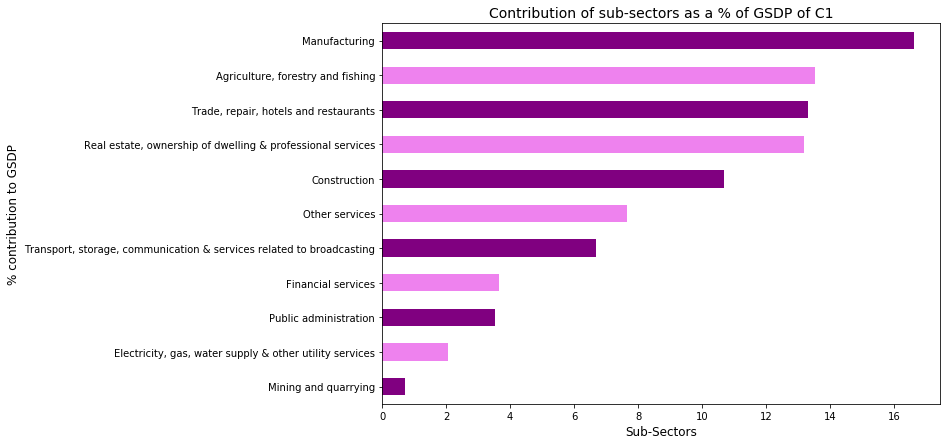

In [99]:
#Plot sub-plots to show the contribution of the sub-sectors as a percentage of the GSDP of each category.
#Category-1
((C1_subsectors_highgsdp.div(C1['Gross State Domestic Product'].sum())) * 100).plot(kind='barh',figsize=(10,7),color=['purple','violet'])
plt.xlabel('Sub-Sectors',fontsize=12)
plt.ylabel('% contribution to GSDP',fontsize=12)
plt.title('Contribution of sub-sectors as a % of GSDP of C1',fontsize=14)
plt.show()

###### Inference from the Bar graph plotted for Category-1(C1).
######  * The major contribution to the overall GSDP is coming from the Manufacturing sector followed by Agriculture,forestry&fishing, Trade, repair, hotels and restaurants, Real estate etc. Minimum contribution is from Mining & quarrying followed by Electricity,gas,water supply&utility services.
######  * Almost all the states in this particular category are famous tourist destinations. Hence, government should focus more on the manufacturing sector as well as agriculture and trade&hotel sectors so, that we can more and more tourists and increase the GSDP.
######  * Other services and services related to transport,storage,communication and broadcasting have a moderate contribution to the GSDP and hence a little more focus on that side may improve the gain from those sectors as well.

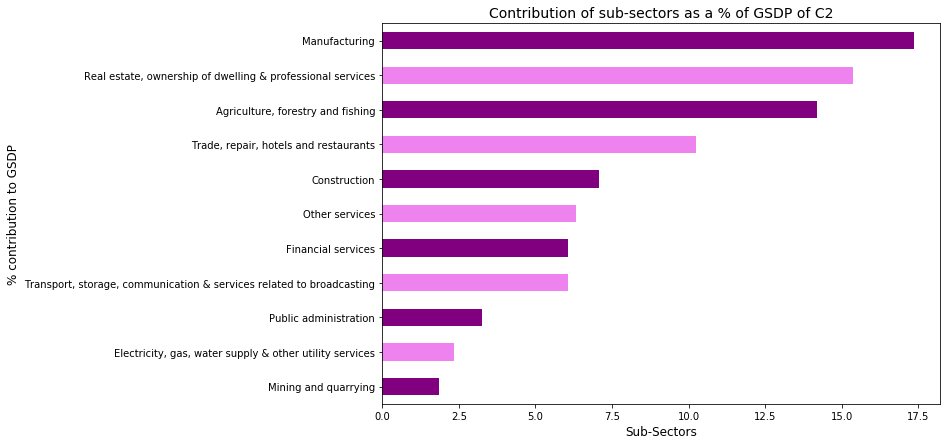

In [100]:
#Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.
((C2_subsectors_highgsdp.div(C2['Gross State Domestic Product'].sum())) * 100).plot(kind='barh',figsize=(10,7),color=['purple','violet'])
plt.xlabel('Sub-Sectors',fontsize=12)
plt.ylabel('% contribution to GSDP',fontsize=12)
plt.title('Contribution of sub-sectors as a % of GSDP of C2',fontsize=14)
plt.show()

###### Inference from the bar graph plotted for category-2(C2).
######  * Here, the sub-sectors contributing to GSDP are  almost the same as in category-1 except that the Real estate,ownership of dwelling&professional services sector has moved to the 2nd position at top, closely behind Manufacturing sector.
######  * Looking at the states falling in this category, the major industries including IT are located here and we may assume this is the reason behind increase in the GSDP from real estate sector as the population would be more in these states. The government should focus more on manufacturing, real estate, agriculture and trade,repair,hotels and restaurants sector.
######  * Same as in category-1, a little more attention towards the other services,financial services and transport,storage etc. can improve the GSDP coming from that side.

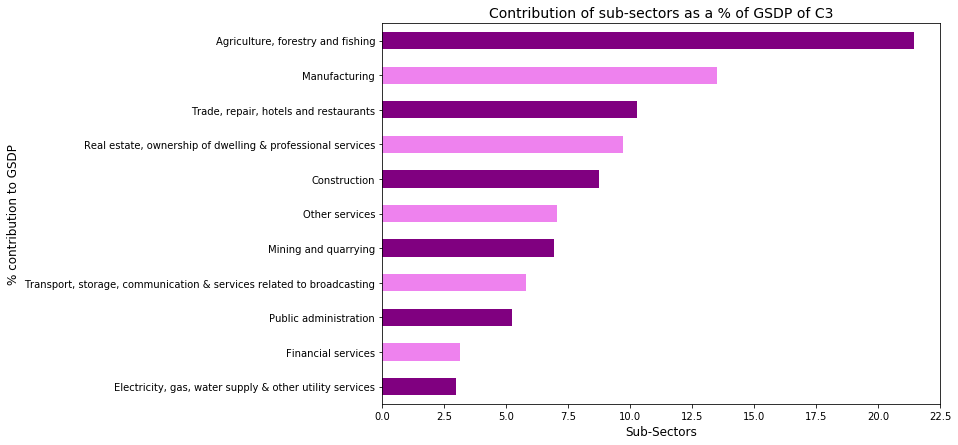

In [101]:
#Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.
((C3_subsectors_highgsdp.div(C3['Gross State Domestic Product'].sum())) * 100).plot(kind='barh',figsize=(10,7),color=['purple','violet'])
plt.xlabel('Sub-Sectors',fontsize=12)
plt.ylabel('% contribution to GSDP',fontsize=12)
plt.title('Contribution of sub-sectors as a % of GSDP of C3',fontsize=14)
plt.show()

###### Inference from the bar graph plotted for Catgeory-3(C3).
######  * The sub-sector with highest contribution to GSDP is Agriculture,forestry and fishing, also the contribution of agriculture sector is very high compared to Category-1 & 2.
###### We can infer from the states in this category that number of industries or companies are less compared to other states and hence more policies or schemes should be implemented to increase the revenue coming from this particular sector.
######  * There is a sudden drop from the agriculture sector to manufacturing sector. Government should focus more on manufacturing sector as once it improves, automatically there would be increase in the trade and real estate sector.
######  * One more thing that we notice here is that the contribution of  Mining&quarrying sector to GSDP is more in this category compared to remaining 3 categories, so they may have potential to bring in more revenue.

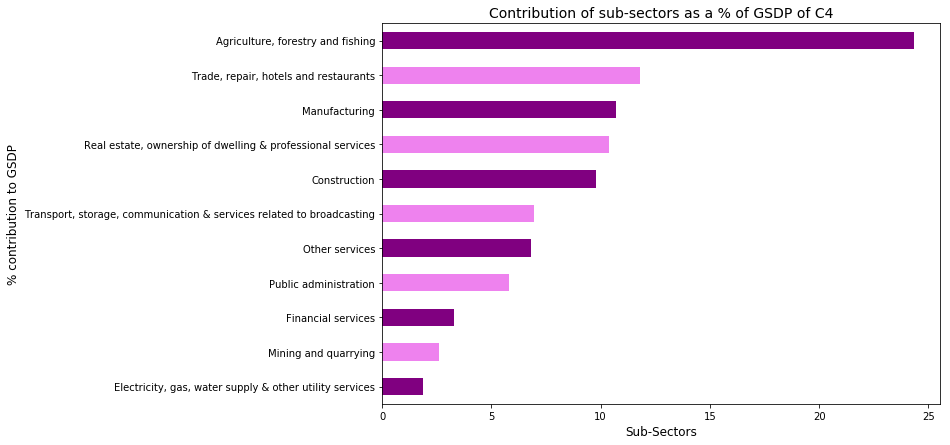

In [102]:
#Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.
#Category-4
((C4_subsectors_highgsdp.div(C4['Gross State Domestic Product'].sum())) * 100).plot(kind='barh',figsize=(10,7),color=['purple','violet'])
plt.xlabel('Sub-Sectors',fontsize=12)
plt.ylabel('% contribution to GSDP',fontsize=12)
plt.title('Contribution of sub-sectors as a % of GSDP of C4',fontsize=14)
plt.show()

###### Inference from the bar graph plotted for Category-4(C4).
######  * This looks similar to Category-3. Agriculture sector has the highest contribution to GSDP exactly like C3. 
###### There is a sudden drop from agriculture to trade,repair,hotels and restaurants sector. Government should try to maintain this by implenting more schemes and policies.
######  * Even here, the manufacturing and real estate sector seme like having the potential to bring in more revenue, so some focus there would improve the GSDP.

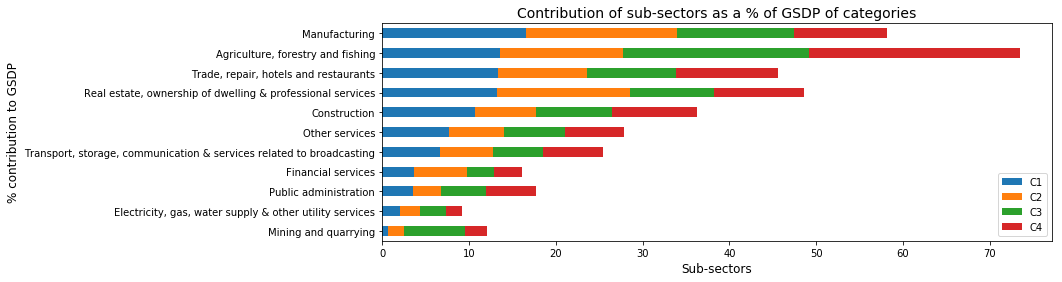

In [103]:
#Creating a combined_df with all categories C1,C2,C3 and C4.
category_combined_df = pd.DataFrame((C1_subsectors_highgsdp.div(C1['Gross State Domestic Product'].sum())) * 100)
category_combined_df = category_combined_df.rename(columns={0 : "C1"})
category_combined_df["C2"] = (C2_subsectors_highgsdp.div(C2['Gross State Domestic Product'].sum())) * 100
category_combined_df["C3"] = (C3_subsectors_highgsdp.div(C3['Gross State Domestic Product'].sum())) * 100
category_combined_df["C4"] = (C4_subsectors_highgsdp.div(C4['Gross State Domestic Product'].sum())) * 100

#Plot a stacked bar graph to see the contribution of sub-sectors in each category.
category_combined_df[['C1','C2','C3','C4']].plot(kind='barh',stacked=True,figsize=(12,4))
plt.xlabel('Sub-sectors',fontsize=12)
plt.ylabel('% contribution to GSDP',fontsize=12)
plt.title('Contribution of sub-sectors as a % of GSDP of categories',fontsize=14)
plt.show()

###### * Inference from the stacked bar graph showing % contribution to GSDP across all categories.
######  One thing that we can see from the above stacked bar chart is the top states in Category C1 and C2 have the 'Manufacturing' sub-sector contributing more to GSDP percentage whereas the C3 and C4 category states have 'Agriculture,Forestry and fishing' leading way.
###### 'Real estate,ownership of dwelling & professional services' sector seem to have prominence in Category-2. Similalrly the 'Financial services' sector is comaparatively more in category-2.
###### 'Electricity,gas,water supply & other utlilty services' seem to be consistently low across all categories.

###### How does the GDP distribution of the top states (C1) differ from the others?
###### One thing that was noticed is that almost all the states falling in C1 category are famous tourist destinations and hence the sector with highest % contribution to GSDP is 'Manufacturing' followed by 'Agriculture,forestry & fishing' and 'Trade,repair, hotel & restaurants' etc.
###### The 'Agriculture,forestry & fishing' sector has the lowest contribution to GDSP in C1 category compared to other categories.
###### The 'Mining & Quarrying' sector is comparatively lowest in category C1 comapred to other categories.

###### Which sub-sectors seem to be correlated with high GDP?
######  * Manufacturing
######  * Agriculture,forestry & fishing
######  * Real estate,ownership of dwelling & professional services
######  * Trade,repair,hotels & restaurants

###### Which sub-sectors do the various categories need to focus on?
###### Category-1 : Manufacturing, Agriculture,forestry & fishing, Trade,repair,hotels & restaurants, Real estate,ownership of dwelling&professional services
###### Category-2 : Manufacturing, Real estate,ownership of dwelling&professional services, Agriculture,forestry & fishing, Trade,repair,hotels & restaurants
###### Category-3 :  Agriculture,forestry & fishing, Manufacturing, Trade,repair,hotels & restaurants, Real estate,ownership of dwelling&professional services
###### Category-4 : Agriculture,forestry & fishing, Trade,repair,hotels & restaurants, Manufacturing, Real estate,ownership of dwelling&professional services

###### Provide at least two recommendations for each category to improve the per capita GDP.
###### Category-1
###### Given below are two recommendations for C1 category:
######  * Almost all the states in this particular category are famous tourist destinations. Hence, government should focus more on the manufacturing sector as well as 'Agriculture,forestry & fishing' and 'Trade, repair, hotel & restaurant' sectors so, that we can more and more tourists and increase the GSDP.
######  * 'Other services' and services related to' Transport,storage,communication and broadcasting' have a moderate contribution to the GSDP and hence a little more focus on that side may improve the gain from those sectors as well.

###### Category-2
###### Given below are two recommendations for C2 category:
######  * Looking at the states falling in this category, the major industries including IT are located here and we may assume this is the reason behind increase in the GSDP from real estate sector as the population would be more in these states. The government should focus more on 'Manufacturing', 'Real estate', 'Agriculture,forestry & fishing' and 'Trade,repair,hotels and restaurants' sector.
######  * Same as in category-1, a little more attention towards the 'Other services','Financial services' and 'Transport,storage,communication and broadcasting' can improve the GSDP coming from that side.

###### Category-3
###### Given below are two recommendations for C3 category:
###### We can infer from the states in this category that number of industries or companies are less compared to other states and hence more policies or schemes should be implemented to increase the revenue coming from that side.
######  * There is a sudden drop from the 'Agriculture,forestry & fishing' sector to 'Manufacturing' sector. Government should focus more on 'Manufacturing' sector as once it improves, automatically there would be increase in the trade and real estate sector.
######  * One more thing that we notice here is that the contribution of 'Mining &quarrying' sector to GSDP is more in this category compared to remaining 3 categories, so they may have potential to bring in more revenue.

###### Category-4
###### Given below are two recommendations for C4 category:
###### There is a sudden drop from 'Agriculture, forestry & fishing' to 'Trade,repair,hotels and restaurants' sector. Government should try to maintain this by implenting more schemes and policies.
######  * Even here, the 'Manufacturing' and 'Real estate, ownership of dwelling & professional services' sector seem like having the potential to bring in more revenue, so some focus there would improve the GSDP.

#### PART II

Text(0.5, 1.0, 'Secondary dropout rate and per capita GDP')

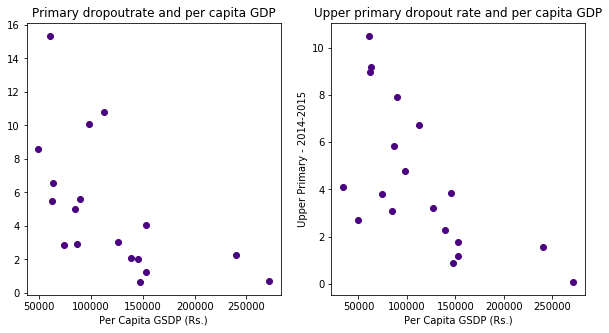

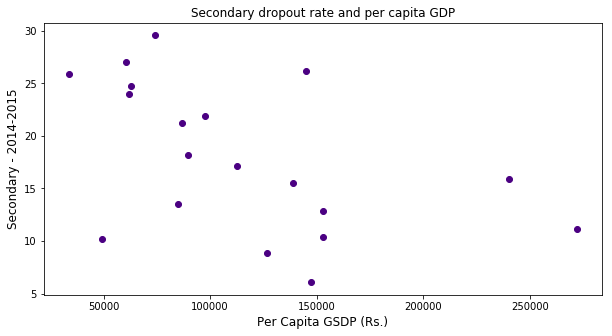

In [104]:
#Reading the Data II- dropout file
dropout_rates_df = pd.read_csv("Dropout_rates.csv")

#Selecting the required columns
dropout_rates_df = dropout_rates_df.loc[:,['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015']]

#Data Quality Check-Renaming few columns
dropout_rates_df = dropout_rates_df.rename(columns={"Level of Education - State": "State", "Primary - 2014-2015.1":"Primary - 2014-2015"})

#Setting State column as index
dropout_rates_df = dropout_rates_df.set_index('State')

#Renaming few indices to ensure same value in both the dataframes
dropout_rates_df = dropout_rates_df.rename(index={"Andhra Pradesh":"Andhra Pradesh ","Uttrakhand":"Uttarakhand","Chhatisgarh":"Chhattisgarh","Jammu and Kashmir":"Jammu & Kashmir"})

#Joining the dropout_rates data with the states dataframe
dropout_rates_df = dropout_rates_df.join(per_capita_gdp_df)

#checking the count of NaN values in each row.
dropout_rates_df.isnull().sum(axis=1)

#remove rows with NaN value > 5
dropout_rates_df = dropout_rates_df[dropout_rates_df.isnull().sum(axis=1) <= 5]

#Creating dataframes for primary,upper primary and secondary dropout rates
prim_gsdp_state_df = dropout_rates_df.loc[:,['Per Capita GSDP (Rs.)','Primary - 2014-2015']]
upper_prim_gsdp_state_df = dropout_rates_df.loc[:,['Per Capita GSDP (Rs.)','Upper Primary - 2014-2015']]
sec_gsdp_state_df = dropout_rates_df.loc[:,['Per Capita GSDP (Rs.)','Secondary - 2014-2015']]

#Creating sub-plots to show the correlation between primary,secondary and upper primary droput rates with Per capita GSDP
# Create 1x2 sub plots for Primary and Upper Primary
gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(10,5))

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

#Primary dropout rate with Per capita GSDP correlation
ax1.scatter('Per Capita GSDP (Rs.)', 'Primary - 2014-2015', data=prim_gsdp_state_df,color=['indigo'])
ax1.set_xlabel('Per Capita GSDP (Rs.)')
ax1.set_label('Primary - 2014-2015')
ax1.set_title('Primary dropoutrate and per capita GDP')

#Upper Primary dropout rate with Per capita GSDP correlation
ax2.scatter('Per Capita GSDP (Rs.)', 'Upper Primary - 2014-2015', data=upper_prim_gsdp_state_df,color='indigo')
ax2.set_xlabel('Per Capita GSDP (Rs.)')
ax2.set_ylabel('Upper Primary - 2014-2015')
ax2.set_title('Upper primary dropout rate and per capita GDP')

#Secondary dropout rate with Per capita GSDP correlation
gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(10,5))

ax3 = plt.subplot(gs[0,:])
ax3.scatter('Per Capita GSDP (Rs.)', 'Secondary - 2014-2015', data=sec_gsdp_state_df,color='indigo')
ax3.set_xlabel('Per Capita GSDP (Rs.)',fontsize=12)
ax3.set_ylabel('Secondary - 2014-2015',fontsize=12)
ax3.set_title('Secondary dropout rate and per capita GDP')

###### The above shown scatter plots show the correlation between Primary,Upper Primary and Secondary dropout rates with Per Capita GDP. It is clearly seen that all of them have a negative linear relationship as high GDSP value has lowest dropout rate and vice versa. 
###### In all of the above plots, if we imagine a line joining the middle points, it will be easier to understand that most of the points do not lie too close to the line, hence we can also say that the relation is not very strong.
###### In nutshell, we can say that in order to increase the per capita GDSP, the dropout rates should come down in all the three levels of education.

###### Form at least one reasonable hypothesis for the observations from the data.

###### The tertiary sector has the maximum contribution to GSDP for the states followedd by Secondary and Primary being the lowest. Now, if we delve deeper and check which sub-sectors are contributing more to GSDP for states, it was found that following sub-sectors are correlated with high GDP:
######  * Manufacturing
######  * Agriculture,forestry & fishing
######  * Real estate,ownership of dwelling & professional services
######  * Trade,repair,hotels & restaurants
######  The categories 1 & 2 which have the states falling into high GSDP are getting more revenue from Manufacturig sectors. 
######  So, government should focus more on improving these sectors. These require skilled people and as we have already seen that the dropout rates of primary,upper primary and secondary and negatively correlated with the GDP. So, we should come up with new policies which will help in decreasing the dropout rates and thereby increasing the GDP.
###### Some investment in the education field , like affordable fee or free education atleast till secondary will motivate more people to complete their education. Also, improving the quality of the education and infrastructure in the government run schools will help in achieving the same.